In [2]:
import os
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import time
import seaborn as sns
np.set_printoptions(threshold=np.nan)

In [9]:
## change the unit of angles to pi
def xytransform(data):
  latitude = np.array(data["latitude"])/180*math.pi
  longitude = np.array(data["longitude"])/180*math.pi
  lam_min=min(latitude)
  lam_max=max(latitude)
  phi_min=min(longitude)
  phi_max=max(longitude)
  R=6.371*10**6
  d1=(lam_max-lam_min)*R
  d2=(phi_max-phi_min)*R*math.sin(math.pi/2-lam_max)
  d3=(phi_max-phi_min)*R*math.sin(math.pi/2-lam_min)
  w1=(latitude-lam_min)/(lam_max-lam_min)
  w2=(longitude-phi_min)/(phi_max-phi_min)
  x=np.array(w1*(d3-d2)/2+w2*(d3*(1-w1)+d2*w1))
  y=np.array(w1*d1*math.sin(math.acos((d3-d2)/(2*d1))))
  return {'x':x,'y':y}

In [14]:
data = pd.DataFrame()
for info in os.listdir('C:/Users/glius/Google Drive/Gaussian Process/gps-iphonex/2019-04-04'):
  domain = os.path.abspath(r'C:/Users/glius/Google Drive/Gaussian Process/gps-iphonex/2019-04-04')
  info = os.path.join(domain,info)
  df = pd.read_csv(info)
  data = data.append(df)
data.shape

(2804, 6)

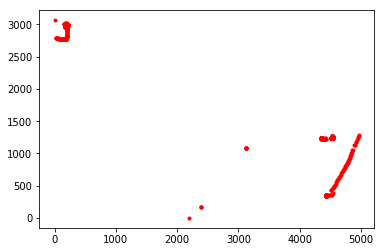

In [15]:
txy = xytransform(data)
plt.plot(txy['x'],txy['y'],'r.')
plt.show()

In [16]:
data = pd.read_csv('C:/Users/glius/Google Drive/Gaussian Process/gps-primetracker/2019-04-04.csv')
data.shape

(225, 3)

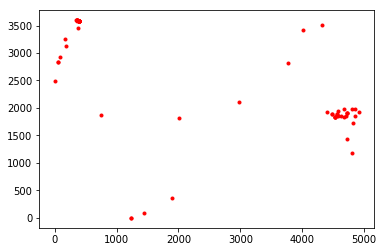

In [17]:
txy = xytransform(data)
plt.plot(txy['x'],txy['y'],'r.')
plt.show()

In [18]:
data = pd.DataFrame()
for info in os.listdir('C:/Users/glius/Google Drive/Gaussian Process/gps-iphonex/2019-04-05'):
  domain = os.path.abspath(r'C:/Users/glius/Google Drive/Gaussian Process/gps-iphonex/2019-04-05')
  info = os.path.join(domain,info)
  df = pd.read_csv(info)
  data = data.append(df)
data.shape

(7653, 6)

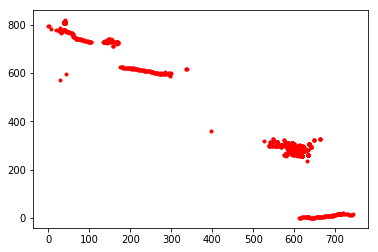

In [19]:
txy = xytransform(data)
plt.plot(txy['x'],txy['y'],'r.')
plt.show()

In [20]:
data = pd.read_csv('C:/Users/glius/Google Drive/Gaussian Process/gps-primetracker/2019-04-05.csv')
data.shape

(1345, 3)

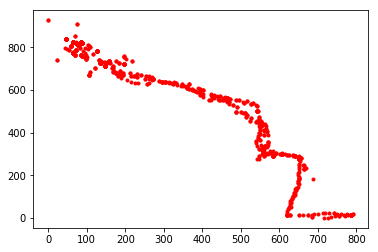

In [21]:
txy = xytransform(data)
plt.plot(txy['x'],txy['y'],'r.')
plt.show()